## 3.1. Naive Bayes

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

dataTrain: pd.DataFrame = pd.read_csv('data/prepared_b_s/data.csv', sep=';')
dataTest: pd.DataFrame = pd.read_csv('data/prepared_test/data.csv', sep=';')
    
dataTest_copy = dataTest.copy(deep=True)

for feature in dataTest_copy.columns:
    if feature not in dataTrain.columns:
        dataTest = dataTest.drop(feature, axis=1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

trnY: np.ndarray = dataTrain.pop('exp').values
trnX: np.ndarray = dataTrain.values
tstY: np.ndarray = dataTest.pop('exp').values
tstX: np.ndarray = dataTest.values
    
labels = pd.unique(trnY)

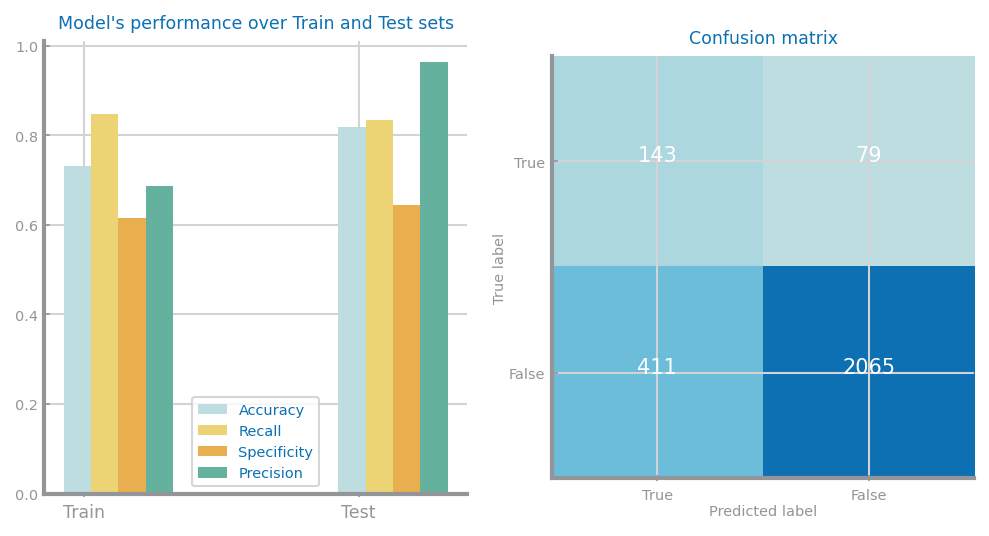

In [3]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)

prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst, showXTickLabels=True)

GaussianNB 0.8183839881393625
MultinomialNB 0.7916975537435137
BernoulyNB 0.8054114158636027


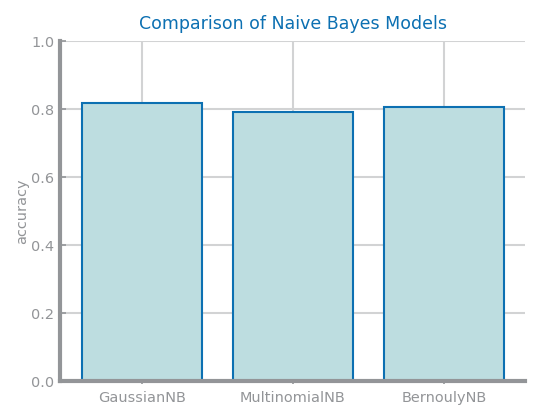

In [4]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))
    print(clf, metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

GaussianNB 0.6441441441441441
MultinomialNB 0.6576576576576577
BernoulyNB 0.6216216216216216


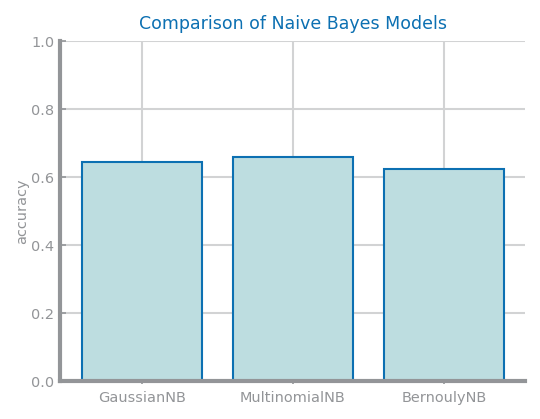

In [6]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulyNB': BernoulliNB()}
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY))
    print(clf, metrics.recall_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

### Summary

---

***Which distribution is more adequate to model our data?***



***Is the accuracy achieved good enough?***


***What is the largest kind of errors?***

